In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
from zigzag import peak_valley_pivots_candlestick

<AxesSubplot:xlabel='Date'>

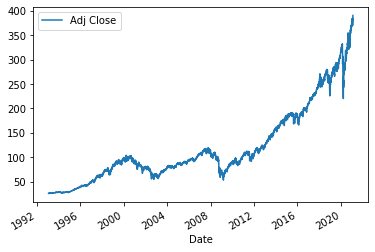

In [2]:
tickers = pd.read_csv("SPY.csv")
tickers["Date"] = pd.to_datetime(tickers["Date"], format="%Y-%m-%d")
tickers.set_index("Date", inplace=True)
tickers.plot(y="Adj Close")

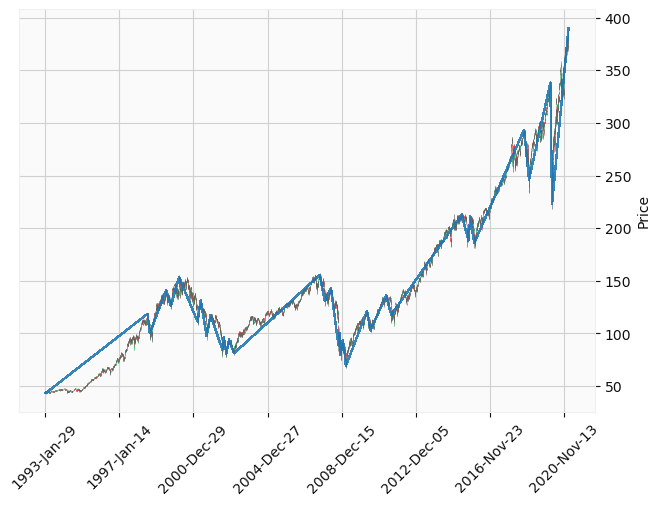

In [16]:
pivots = peak_valley_pivots_candlestick(tickers.Close, tickers.High, tickers.Low, .1, -.1)
tickers["pivots"] = pivots
points_to_draw = tickers[tickers["pivots"]!= 0]["Close"]
points_to_draw.index = points_to_draw.index.astype(str)
mpf.plot(tickers, alines=dict(alines=list(points_to_draw.to_dict().items()), linewidths=1, alpha=.9), type="candle", style="yahoo")

In [17]:
np.array(np.abs(pivots[pivots != 0])).sum()

39

In [76]:
from pandas_datareader import data

# Only get the adjusted close.
tickers = data.DataReader(
    "AAPL", start='2018-1-1', end='2020-12-31', data_source='yahoo'
)

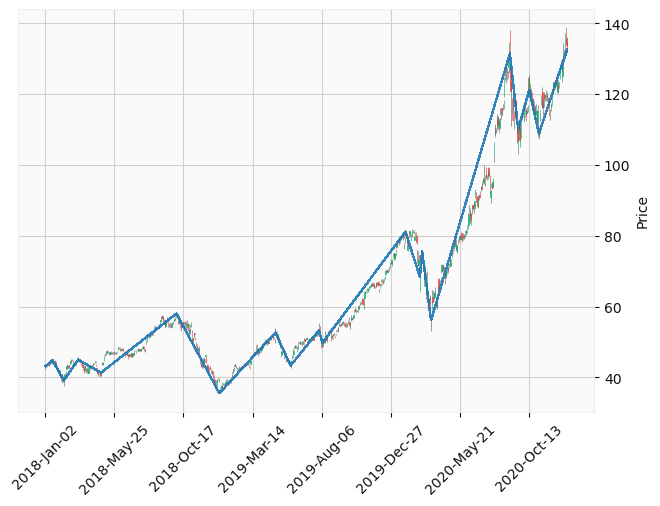

In [79]:
pivots = peak_valley_pivots_candlestick(tickers.Close, tickers.High, tickers.Low, .1, -.1)
tickers["pivots"] = pivots
points_to_draw = tickers[tickers["pivots"]!= 0]["Close"]
points_to_draw.index = points_to_draw.index.astype(str)
mpf.plot(tickers, alines=dict(alines=list(points_to_draw.to_dict().items()), linewidths=1, alpha=.9), type="candle", style="yahoo")